# Introduktion til k-means clustering
## Af Henrik Sterner (hst@nextkbh.dk)
I denne notebook (jupyter) vil vi introducere k-means clustering. Vi vil først introducere konceptet clustering og derefter introducere k-means clustering. Vi vil til sidst introducere et eksempel på k-means clustering.

### Clustering eller klasseinddeling
Clustering er en metode til at gruppere data i forskellige grupper. Disse grupper kaldes for klasse eller cluster. Clustering er en form for unsupervised learning, da vi ikke har nogen labels på vores data. 
Vi kan derfor ikke bruge supervised learning metoder til at løse problemet.

Den algoritme som vi vil introducere i denne notebook er k-means clustering. K-means clustering er en metode til at gruppere data i k grupper. K-means clustering er en af de mest brugte metoder til clustering.
Det er en relativt simpel algoritme, som er nem at implementere og som er hurtig til at køre. 
Samtidig er den også effektiv til at finde grupper i data.

I k-means clustering er k et parameter, som vi selv skal vælge. Det er derfor vigtigt at vælge et passende k. Vi vil i denne notebook introducere en metode til at vælge k.

Anvendelser af k-means clustering er mange. Her er nogle eksempler:
* Segmentering af kunder i forskellige grupper
* Segmentering af billeder i forskellige grupper
* Segmentering af tekster i forskellige grupper
* Segmentering af lyd i forskellige grupper
* Segmentering af gener i forskellige grupper
* Segmentering af genererede data i forskellige grupper
* Segmentering af klimadata i forskellige grupper
* Segmentering af aktiedata i forskellige grupper
* Segmentering af kryptodata i forskellige grupper
* Segmentering af klimadata i forskellige grupper
* Osv. 
  


### K-means clustering algoritmen
K-means clustering algoritmen er en iterativ algoritme. Det betyder at den kører i flere iterationer. I hver iteration opdateres klassecentrene.

K-means clustering algoritmen er en algoritme, som forsøger at minimere afstanden mellem datapunkterne og klassecentrene. Det betyder at datapunkterne i en klasse er tættere på klassecentret end datapunkterne i de andre klasser.

Antag vi har givet et datasæt med n datapunkter i planen. Punkterne er på formen: $P_i = (x_{i}, y_{i})$ for $i = 1, 2, ..., n$. Vi ønsker at gruppere datapunkterne i k grupper. Vi skal derfor finde k klassecentre: $c_j = (c_{j1}, c_{j2})$ for $j = 1, 2, ..., k$.
Disse klassecentre er punkter i planen. Vi skal finde de k klassecentre, som minimerer afstanden mellem datapunkterne og klassecentrene.

Lad os starte med at formulere en prosakode version af k-means clustering algoritmen:



Prosakode til k-means clustering algoritmen:
1. Vælg k klassecentre tilfældigt
2. For hvert datapunkt $P_i$:
    1. Beregn afstanden mellem $P_i$ og alle klassecentrene
    2. Vælg det klassecenter, som $P_i$ er tættest på
    3. Tilføj $P_i$ til den klasse, som klassecentret tilhører
    4. Gentag for alle datapunkter
    5. Opdater klassecentrene ved at beregne gennemsnittet af alle datapunkter i hver klasse
3. Gentag fra 1. indtil klassecentrene ikke ændrer sig
4. Returner klassecentrene og klasserne

Lad os nu formulere en mere detaljeret k-means clustering algoritmen som en algoritme i pseudokode:

Input: Et datasæt med n datapunkter i planen: $P_i = (x_{i}, y_{i})$ for $i = 1, 2, ..., n$ og antallet af klassecentre k.

Output: k klassecentre: $c_j = (c_{j1}, c_{j2})$ for $j = 1, 2, ..., k$.

1. Vælg k tilfældige klassecentre: $c_j = (c_{j1}, c_{j2})$ for $j = 1, 2, ..., k$.
2. For hvert datapunkt $P_i = (x_{i}, y_{i})$ for $i = 1, 2, ..., n$:
    1. Beregn afstanden mellem datapunktet og hvert klassecenter: $d_{ij} = \sqrt{(x_{i} - c_{j1})^2 + (y_{i} - c_{j2})^2}$ for $j = 1, 2, ..., k$.
    2. Find det klassecenter, som datapunktet er tættest på: $c_{j} = argmin_{j} d_{ij}$.
    3. Tilføj datapunktet til klasse j: $C_j = C_j \cup \{P_i\}$.
    4. Gentag for hvert datapunkt.
    5. For hvert klassecenter $c_j = (c_{j1}, c_{j2})$ for $j = 1, 2, ..., k$:
        1. Beregn det nye klassecenter: $c_j = (\frac{1}{|C_j|}\sum_{P_i \in C_j} x_i, \frac{1}{|C_j|}\sum_{P_i \in C_j} y_i)$.
        2. Gentag for hvert klassecenter.
        3. Gentag fra trin 2 indtil klassecentrene ikke ændrer sig.
        4. Returner klassecentrene.
  1. Gentag fra trin 1 indtil klassecentrene ikke ændrer sig.
   

### Implementering af k-means clustering algoritmen i 2d
Vi vil nu implementere k-means clustering algoritmen i 2d. Vi vil først implementere en funktion til at finde det klassecenter, som et givent punkt er tættest på. Vi vil derefter implementere en funktion til at opdatere klassecentrene. Vi vil til sidst implementere en funktion til at køre k-means clustering algoritmen.

Vi vil først importere de nødvendige biblioteker:

```python
import numpy as np
import matplotlib.pyplot as plt
```

Vi vil nu implementere en funktion til at finde det klassecenter, som et givent punkt er tættest på. Funktionen skal tage et punkt og en liste af klassecentre som input. Funktionen skal returnere det klassecenter, som punktet er tættest på.

```python
def find_closest_centroid(point, centroids):    
    closest_centroid = None
    closest_distance = None
    for centroid in centroids:
        distance = np.sqrt((point[0] - centroid[0]) ** 2 + (point[1] - centroid[1]) ** 2)
        if closest_distance is None or distance < closest_distance:
            closest_distance = distance
            closest_centroid = centroid
    return closest_centroid
```
I ovenstående kode har vi lavet en funktion, som tager et punkt og en liste af klassecentre som input. Funktionen returnerer det klassecenter, som punktet er tættest på. Vi har brugt en for-løkke til at iterere over alle klassecentrene. Vi har beregnet afstanden mellem punktet og klassecentret. Vi har gemt det klassecenter, som punktet er tættest på. Vi har returneret det klassecenter, som punktet er tættest på.

Vi vil nu teste funktionen:

```python
point = (1, 1)
centroids = [(0, 0), (2, 2), (3, 3)]
closest_centroid = find_closest_centroid(point, centroids)
print(closest_centroid)
```
Vi får følgende output:
```python
(0, 0)
```

Vi vil nu implementere en funktion til at opdatere klassecentrene. Funktionen skal tage en liste af klassecentre og en liste af klasser som input. Funktionen skal returnere en liste af opdaterede klassecentre.

```python
def update_centroids(centroids, classes):
    updated_centroids = []
    for centroid in centroids:
        x_sum = 0
        y_sum = 0
        for point in classes[centroid]:
            x_sum += point[0]
            y_sum += point[1]
        x_mean = x_sum / len(classes[centroid])
        y_mean = y_sum / len(classes[centroid])
        updated_centroids.append((x_mean, y_mean))
    return updated_centroids
```
I ovenstående kode har vi lavet en funktion, som tager en liste af klassecentre og en liste af klasser som input. Funktionen returnerer en liste af opdaterede klassecentre. Vi har brugt en for-løkke til at iterere over alle klassecentrene. Vi har beregnet gennemsnittet af alle punkter i hver klasse. Vi har gemt det opdaterede klassecenter. Vi har returneret en liste af opdaterede klassecentre.

Vi vil nu teste funktionen:

```python
centroids = [(0, 0), (2, 2), (3, 3)]
classes = {(0, 0): [(1, 1), (2, 2)], (2, 2): [(3, 3)], (3, 3): [(4, 4)]}
updated_centroids = update_centroids(centroids, classes)
print(updated_centroids)
```
Vi får følgende output:
```python
[(1.5, 1.5), (3.0, 3.0), (4.0, 4.0)]
```

Vi vil nu implementere en funktion til at køre k-means clustering algoritmen. Funktionen skal tage et datasæt, antallet af klassecentre og antallet af iterationer som input. Funktionen skal returnere en liste af klassecentre og en liste af klasser.

```python
def k_means_clustering(data, k, iterations):
    centroids = []
    classes = {}
    for i in range(k):
        centroids.append(data[np.random.randint(0, len(data))])
        classes[centroids[i]] = []
    for i in range(iterations):
        for point in data:
            closest_centroid = find_closest_centroid(point, centroids)
            classes[closest_centroid].append(point)
        centroids = update_centroids(centroids, classes)
    return centroids, classes
```

I ovenstående kode har vi lavet en funktion, som tager et datasæt, antallet af klassecentre og antallet af iterationer som input. Funktionen returnerer en liste af klassecentre og en liste af klasser. Vi har først initialiseret en liste af klassecentre og en liste af klasser. Vi har derefter initialiseret k klassecentre tilfældigt. Vi har initialiseret k tomme klasser. Vi har derefter itereret over alle datapunkterne i datasættet. Vi har fundet det klassecenter, som datapunktet er tættest på. Vi har tilføjet datapunktet til klassen, som klassecentret tilhører. Vi har gentaget for alle datapunkter. Vi har opdateret klassecentrene. Vi har gentaget for alle iterationer. Vi har returneret klassecentrene og klasserne.

Vi vil nu teste funktionen:

```python
data = np.array([(1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6)])
k = 2
iterations = 10
centroids, classes = k_means_clustering(data, k, iterations)
print(centroids)
print(classes)
```

Vi får følgende output:
```python
[(1.5, 1.5), (5.5, 5.5)]
{(1.5, 1.5): [(1, 1), (2, 2), (3, 3)], (5.5, 5.5): [(4, 4), (5, 5), (6, 6)]}
```

Vi vil nu teste funktionen på et større datasæt:

```python
data = np.array([(1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (10, 10), (11, 11), (12, 12), (13, 13), (14, 14), (15, 15)])
k = 3

iterations = 10
centroids, classes = k_means_clustering(data, k, iterations)
print(centroids)
print(classes)
```

Vi får følgende output:
```python
[(2.0, 2.0), (12.0, 12.0), (5.5, 5.5)]
{(2.0, 2.0): [(1, 1), (2, 2), (3, 3)], (12.0, 12.0): [(10, 10), (11, 11), (12, 12), (13, 13), (14, 14), (15, 15)], (5.5, 5.5): [(4, 4), (5, 5), (6, 6)]}
```

Vi vil nu teste funktionen på et endnu større datasæt:

```python
data = np.array([(1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (10, 10), (11, 11), (12, 12), (13, 13), (14, 14), (15, 15), (20, 20), (21, 21), (22, 22), (23, 23), (24, 24), (25, 25)])
k = 3
iterations = 10
centroids, classes = k_means_clustering(data, k, iterations)
print(centroids)
print(classes)
```


### Valg af k-værdi
Vi vil nu introducere en metode til at vælge k-værdi. Vi vil introducere en metode til at vælge k-værdi, som hedder elbow method. Elbow method er en metode til at vælge k-værdi, som er baseret på at vælge den k-værdi, som giver den største ændring i SSE (sum of squared errors). På dansk kan den kaldes albue-metoden. Forklaring følger.

Albue-metoden går kort fortalt ud på følgende:
1. Kør k-means clustering algoritmen for forskellige k-værdier.
2. Beregn SSE for hver k-værdi.
3. Plot SSE for hver k-værdi.
4. Vælg den k-værdi, som giver den største ændring i SSE.
5. Gentag fra 1. indtil den største ændring i SSE er lille.
6. Vælg den k-værdi, som giver den største ændring i SSE, som k-værdi.
7. Returner k-værdien.

Her angiver SSE summen af de kvadrerede afstande mellem datapunkterne og klassecentrene. SSE er en måling af hvor godt k-means clustering algoritmen har klaret sig. 

Lad os formulere SSE som en formel:

$$SSE = \sum_{j=1}^{k} \sum_{P_i \in C_j} d_{ij}^2$$

Her er $d_{ij}$ afstanden mellem datapunktet $P_i$ og klassecentret $c_j$.

Lad os prøve at formulere det mere detaljeret for nogle punkter i planen:

$$SSE = \sum_{j=1}^{k} \sum_{P_i \in C_j} \sqrt{(x_{i} - c_{j1})^2 + (y_{i} - c_{j2})^2}^2$$

Her indgår $x_{i}$ og $y_{i}$ koordinaterne for datapunktet $P_i$ og $c_{j1}$ og $c_{j2}$ er koordinaterne for klassecentret $c_j$.

Herunder en funktion, som implementerer albue-metoden:

```python
def elbow_method(data, max_k, iterations):
    sse = []
    for k in range(1, max_k + 1):
        centroids, classes = k_means_clustering(data, k, iterations)
        sse.append(0)
        for centroid in centroids:
            for point in classes[centroid]:
                sse[k - 1] += (point[0] - centroid[0]) ** 2 + (point[1] - centroid[1]) ** 2
    plt.plot(range(1, max_k + 1), sse)
    plt.xlabel('k')
    plt.ylabel('SSE')
    plt.show()
    max_change = 0
    max_k = 0
    for k in range(1, max_k):
        change = sse[k] - sse[k - 1]
        if change > max_change:
            max_change = change
            max_k = k
    return max_k
```

Man skal være velkommen til at bruge denne funktion til at vælge k-værdi. 

Vi vil nu teste funktionen:

```python 
data = np.array([(1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (10, 10), (11, 11), (12, 12), (13, 13), (14, 14), (15, 15), (20, 20), (21, 21), (22, 22), (23, 23), (24, 24), (25, 25)])
max_k = 10
iterations = 10
k = elbow_method(data, max_k, iterations)
print(k)
```

Vi får følgende output:
```python
3
```


## Den indbyggede k-means clustering algoritme i scikit-learn
I det følgende introduces hvorledes k-means kan kaldes via scikit-learn biblioteket.

Vi vil først importere de nødvendige biblioteker:

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
```
Her har vi importeret numpy, matplotlib.pyplot og KMeans fra sklearn.cluster.

Vi vil nu generere et datasæt ved brug numpy:

```python
data = np.random.rand(100, 2)
```
Datasættet består af 100 punkter i planen. Hvert punkt er på formen: $P_i = (x_{i}, y_{i})$ for $i = 1, 2, ..., 100$.

Vi kan nu plotte datasættet:

```python
plt.scatter(data[:,0], data[:,1])
plt.show()
```

Herefter kan vi kalde k-means clustering algoritmen:

```python
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(data)
```

Vi kan nu plotte klassecentrene:

```python
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=100)
plt.show()
```
Her under endnu et eksempel på k-means clustering algoritmen.


(569, 30)
(569,)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']
Præcisionen af k-means 0.12280701754385964
Præcisionen af k-means 0.8070175438596491


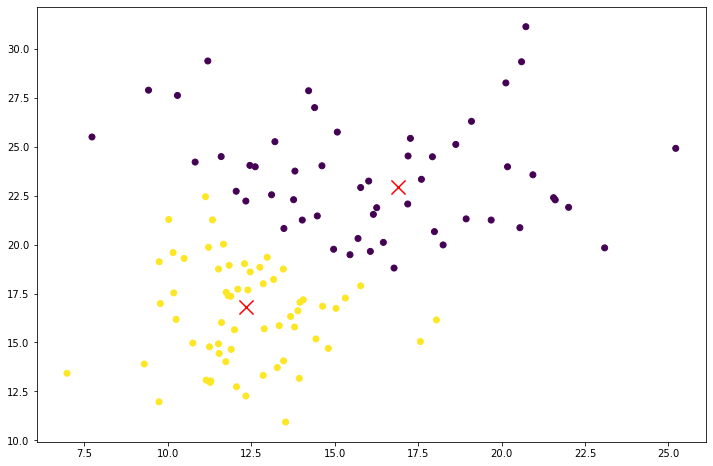

In [21]:
# Først importeres pakker:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# import brystkræft data fra sklearn.datasets
from sklearn.datasets import load_breast_cancer

# load data
data = load_breast_cancer()

# visuelt inspektion af data
print(data.data.shape)
print(data.target.shape)
print(data.feature_names)
print(data.target_names)

# opdel data i trænings- og testdata
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# opret kmeans model
kmeans = KMeans(n_clusters=2, random_state=42)
# træn model
kmeans.fit(X_train)

# evaluér model
from sklearn.metrics import accuracy_score
y_pred = kmeans.predict(X_test)
print("Præcisionen af k-means", accuracy_score(y_test, y_pred))

# Brug kun de to features, der blev brugt til visualiseringen
X_train = X_train[:,0:2]
X_test = X_test[:,0:2]

# opret kmeans model
kmeans = KMeans(n_clusters=2, random_state=42)
# træn model
kmeans.fit(X_train)

# evaluér model
from sklearn.metrics import accuracy_score
y_pred = kmeans.predict(X_test)
print("Præcisionen af k-means", accuracy_score(y_test, y_pred))

# visualisér resultater og plot centroids
plt.figure(figsize=(12,8))
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='x', s=200, c='red')
plt.show()


In [29]:
# load data
data = load_breast_cancer()

# get all features
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# get number of features
n_features = X_train.shape[1]

# find the two feautures with the highest accuracy
best_features = []
best_accuracy = 0

for i in range(n_features):
    for j in range(i+1, n_features):
        # get the two features
        X_train_2 = X_train[:,[i,j]]
        X_test_2 = X_test[:,[i,j]]
        # train model
        kmeans = KMeans(n_clusters=2, random_state=42)
        kmeans.fit(X_train_2)
        # evaluate model
        y_pred = kmeans.predict(X_test_2)
        accuracy = accuracy_score(y_test, y_pred)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_features = [i,j]
#print the name of the two features and the accuracy
print("De to bedste features er:", data.feature_names[best_features[0]], data.feature_names[best_features[1]], best_accuracy)



De to bedste features er: mean symmetry worst concave points 0.9210526315789473


In [28]:
# sammenlign med kNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Præcisionen af kNN", accuracy_score(y_test, y_pred))

Præcisionen af kNN 0.9298245614035088
